In [2]:
# import re
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import pickle
# from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import Pipeline

# import nltk
from konlpy.tag import Okt
# from gensim.models import Word2Vec
# from gensim.models import KeyedVectors
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as km
# from sklearn.cluster import MiniBatchKMeans
from bs4 import BeautifulSoup
import pickle
import hdbscan
from sklearn.cluster import DBSCAN


# 한글 폰트 설정
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~')

-----------

## KMeans


In [17]:
path = "../datas/"
data = pd.read_csv(path+'camp_data_merge.csv')
data['intro'] = data[['intro']].fillna(0)
data = data[data['intro'] != 0].reset_index(drop=True)
data['intro'] = data['intro'].str.replace("&apos;", "")

In [18]:
with open('../datas/tf.pk', 'rb') as f:
    tf = pickle.load(f)

In [19]:
with open('../datas/camp_tf.pk', 'rb') as f:
    camp_tf = pickle.load(f)

In [26]:
kmeans = km(n_clusters=6, max_iter=10000, random_state=42).fit(camp_tf)
cluster_label = kmeans.fit_predict(camp_tf)

# 군집화한 레이블값들을 df 에 추가하기
df = pd.DataFrame(data['intro'])
df['cluster_label'] = cluster_label
df['tags'] = data['tags']

print(np.unique(df["cluster_label"]))
df.tail(2)

[0 1 2 3 4 5]


,intro,cluster_label,tags
1518,함허동천 야영장은 인천광역시 강화군 화도면에 자리했다. 강화군청을 기점으로 동막해변...,3,#사이트 간격이 넓은 #아이들 놀기 좋은 #계곡옆 #그늘이 많은 #가족
1519,합천아마존캠핑장은 수려한 합천의 합천호를 품에 안은 캠핑장으로 펜션과 야영장이 함께...,1,#친절한 #사이트 간격이 넓은 #깨끗한 #온수 잘 나오는 #차대기 편한 #수영장 있...


In [29]:
df[df['cluster_label'] == 0][['cluster_label','tags']]
df[df['cluster_label'] == 1][['cluster_label','tags']]
df[df['cluster_label'] == 2][['cluster_label','tags']]
df[df['cluster_label'] == 3][['cluster_label','tags']]
df[df['cluster_label'] == 4][['cluster_label','tags']]
df[df['cluster_label'] == 5][['cluster_label','tags']]

,cluster_label,tags
24,5,#친절한 #재미있는 #여유있는 #사이트 간격이 넓은 #깨끗한 #온수 잘 나오는 #차...
55,5,#친절한 #여유있는 #사이트 간격이 넓은 #깨끗한 #온수 잘 나오는 #차대기 편한 ...
56,5,#여유있는 #사이트 간격이 넓은 #깨끗한 #온수 잘 나오는 #둘레길 #별 보기 좋은...
58,5,#친절한 #재미있는 #여유있는 #사이트 간격이 넓은 #깨끗한 #온수 잘 나오는 #차...
156,5,#친절한 #재미있는 #여유있는 #사이트 간격이 넓은 #깨끗한 #온수 잘 나오는 #차...
...,...,...
1440,5,#친절한 #재미있는 #여유있는 #사이트 간격이 넓은 #깨끗한 #온수 잘 나오는 #계...
1447,5,#친절한 #재미있는 #여유있는 #사이트 간격이 넓은 #깨끗한 #온수 잘 나오는 #차...
1450,5,#친절한 #재미있는 #깨끗한 #온수 잘 나오는 #차대기 편한 #아이들 놀기 좋은 #...
1474,5,#친절한 #재미있는 #여유있는 #사이트 간격이 넓은 #깨끗한 #온수 잘 나오는 #차...


In [31]:
df.groupby('cluster_label').size().reset_index

<bound method Series.reset_index of cluster_label
0    147
1    215
2    325
3    556
4    159
5    118
dtype: int64>

-----

## TSNE

In [439]:
tsne = TSNE(learning_rate=100)
tsne_fit = tsne.fit_transform(camp_tf)
tsne_df = pd.DataFrame(tsne_fit, index=data.index, columns=['x', 'y'])

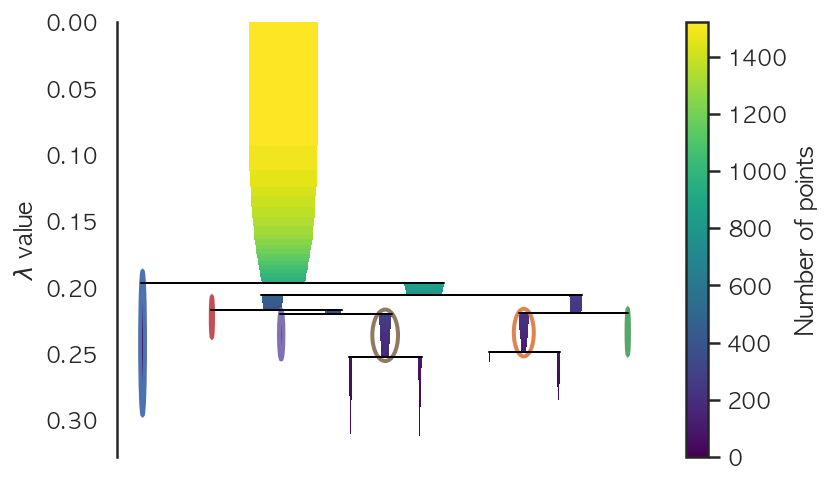

In [440]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=16, gen_min_span_tree=True)
clusterer.fit(tsne_df)

# 클러스터를 몇개로 하면 좋을지 알려줌
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [441]:
# 모델 객체 생성
model_hds = hdbscan.HDBSCAN(min_cluster_size=16).fit(tsne_df)

# 예측 데이터 생성
pred_hds = model_hds.fit_predict(tsne_df)

# 데이터 프레임 만들기
df3 = pd.DataFrame(tsne_df)
df3["labels"] = pred_hds

print(np.unique(df3["labels"]), len(df3))
df3.tail(2)

[-1  0  1  2  3  4  5] 1520


,x,y,labels
1518,17.199499,-19.799414,-1
1519,-34.934971,8.119616,-1


KeyError: 0

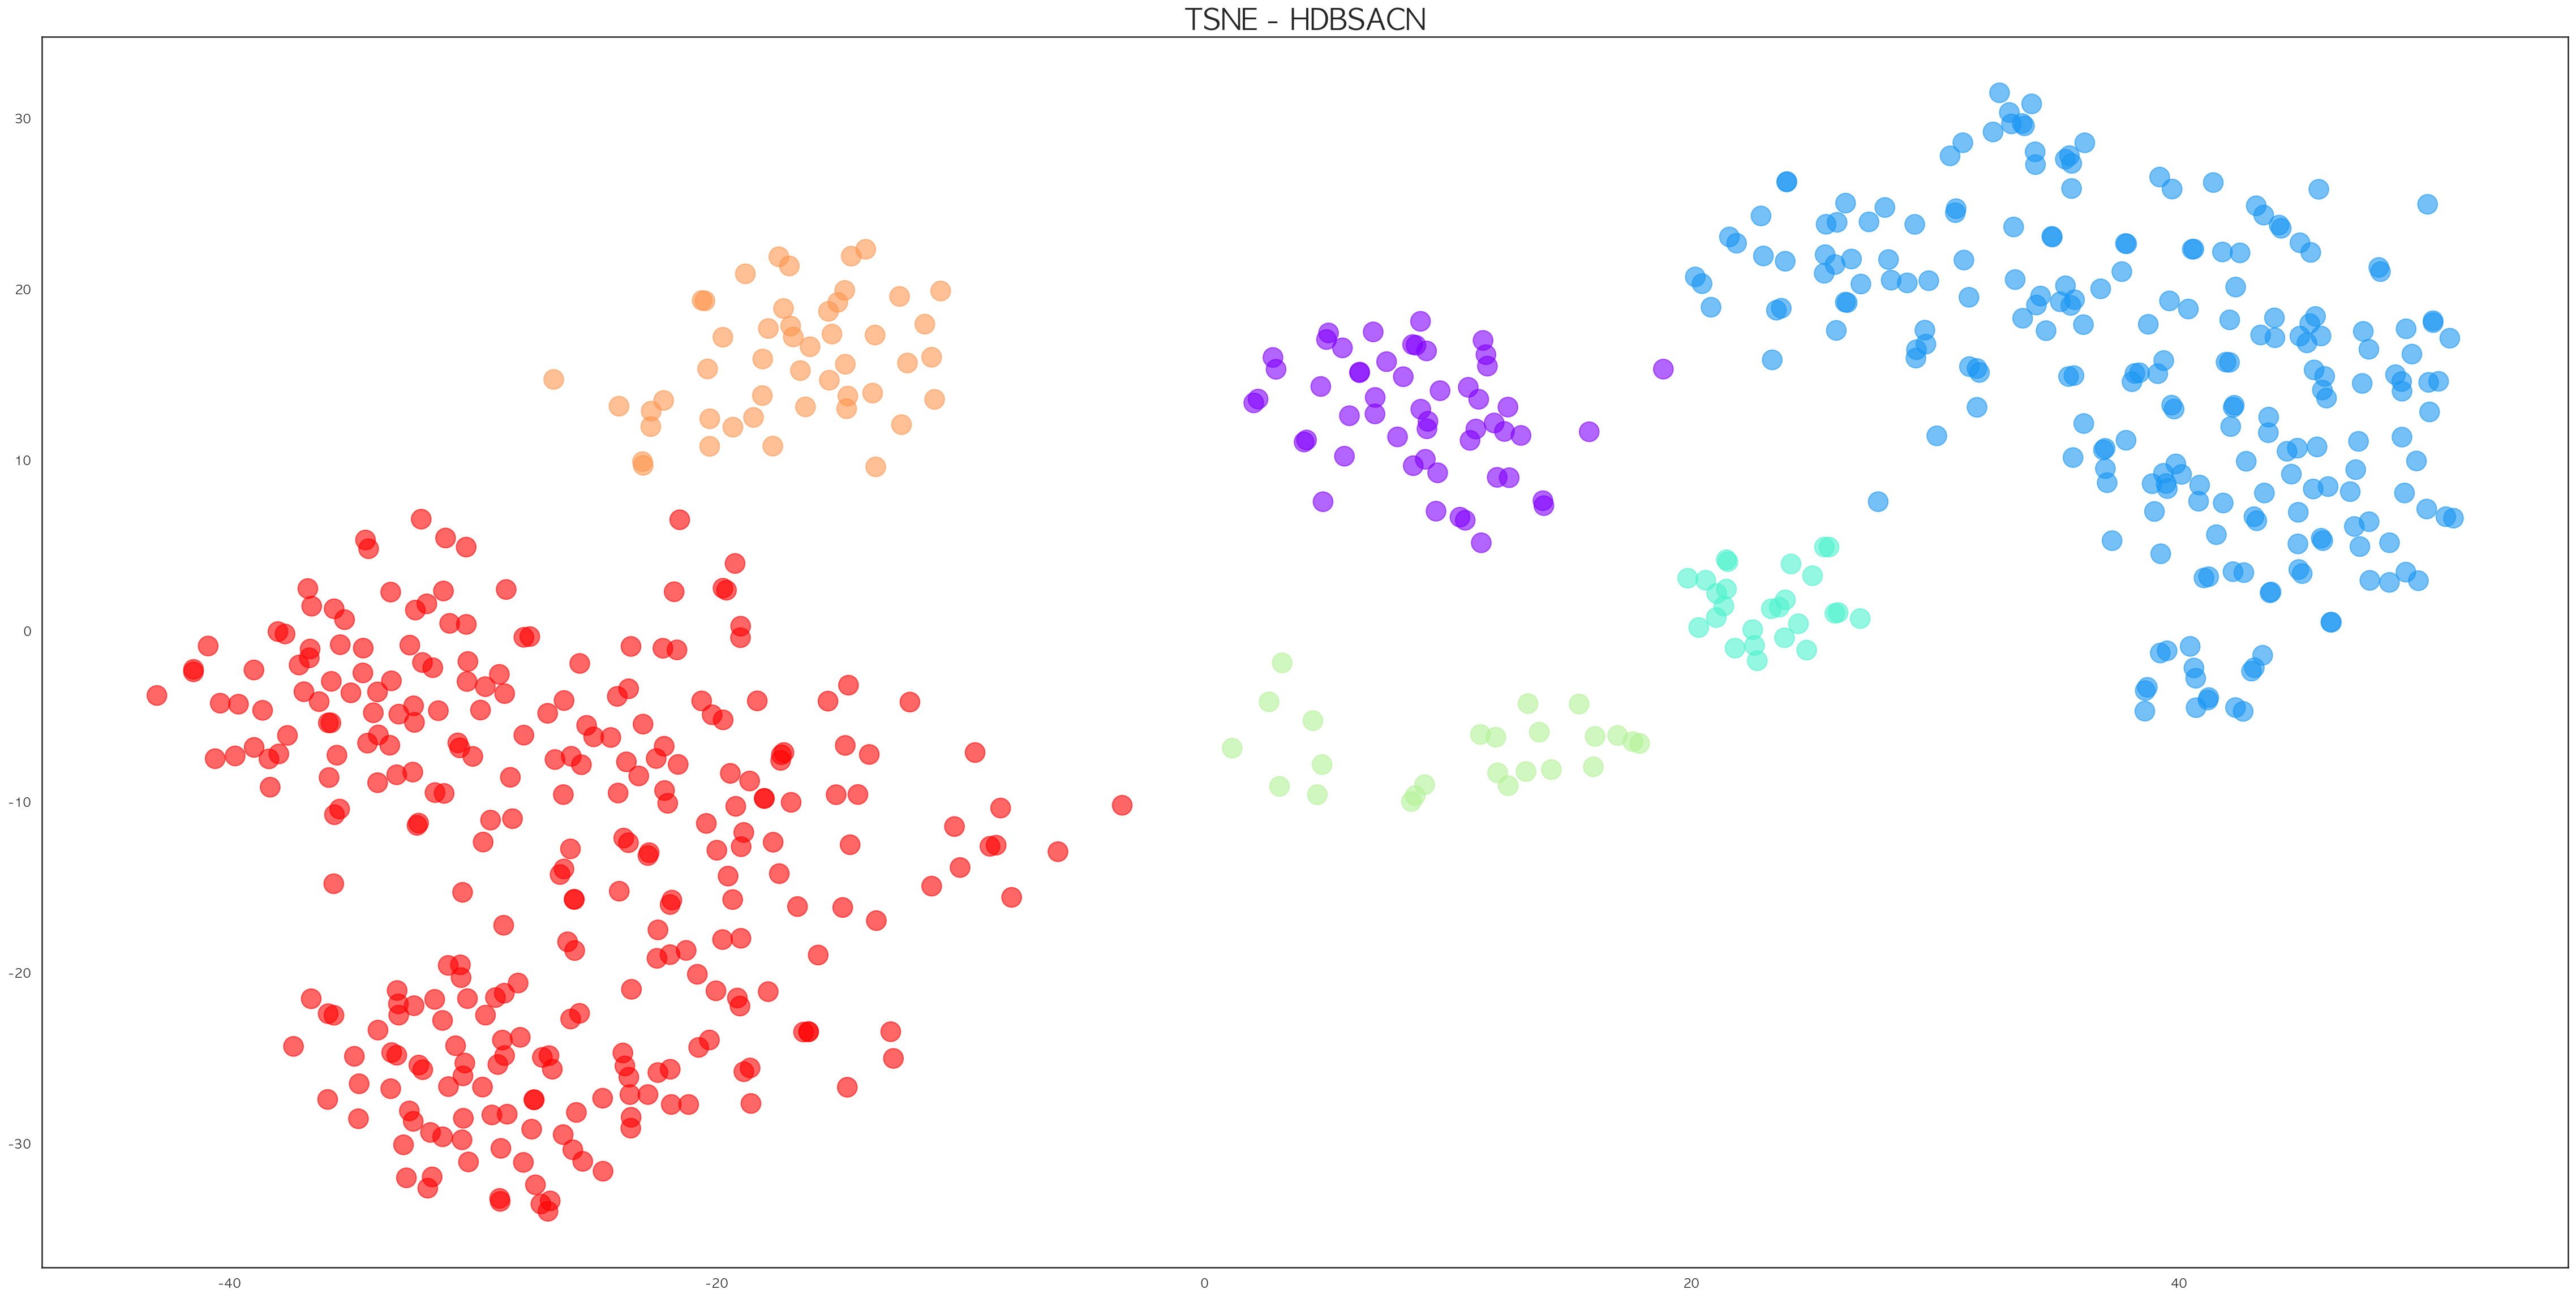

In [442]:
plt.figure(figsize=(40, 20))
plt.title("TSNE - HDBSACN", fontsize= 25)
df3.drop(df3[df3['labels']== -1].index,inplace=True)
plt.scatter(df3["x"], df3["y"], c= df3["labels"], s=300, cmap="rainbow", alpha=0.6)
    
for i, v in enumerate(df3.index):
    plt.annotate(v, xy=(df3["x"][i], df3["y"][i]), fontsize=30)

plt.show()

In [443]:
for idx in np.unique(df3["labels"]):
    print(f"Group{idx}\n",df3[df3["labels"]==idx].index.tolist())

Group0
 [18, 26, 27, 34, 57, 65, 67, 76, 163, 171, 203, 222, 296, 297, 328, 353, 370, 383, 392, 404, 551, 709, 743, 770, 771, 811, 852, 856, 1048, 1058, 1126, 1138, 1158, 1161, 1166, 1177, 1226, 1248, 1300, 1309, 1315, 1338, 1363, 1383, 1414, 1418, 1421, 1422, 1427, 1432, 1449, 1452, 1480]
Group1
 [23, 32, 38, 47, 48, 52, 54, 61, 68, 72, 84, 85, 86, 89, 106, 118, 149, 150, 159, 162, 165, 169, 173, 174, 192, 194, 196, 197, 199, 211, 212, 213, 214, 219, 221, 242, 282, 283, 284, 285, 286, 288, 289, 299, 307, 312, 313, 324, 331, 334, 347, 365, 385, 395, 397, 398, 400, 414, 421, 425, 427, 434, 438, 441, 444, 449, 451, 460, 461, 462, 516, 533, 554, 564, 568, 576, 578, 585, 597, 621, 633, 651, 656, 661, 671, 687, 700, 702, 707, 712, 717, 718, 724, 726, 730, 735, 736, 737, 740, 749, 751, 755, 759, 760, 768, 778, 779, 780, 786, 793, 798, 799, 805, 815, 822, 835, 843, 845, 853, 855, 857, 858, 859, 871, 880, 901, 902, 917, 919, 975, 992, 993, 994, 997, 998, 1005, 1025, 1028, 1032, 1045, 1046, 104

-----------------
## TRY_Full Text

In [11]:
path = "../datas/"
data = pd.read_csv(path+'camp_data_merge.csv')
# data['intro'] = data[['intro']].fillna(0)
# data = data[data['intro'] != 0].reset_index(drop=True)
data['intro'] = data['intro'].str.replace("&apos;", "")

In [12]:
datas = data[['facltNm','lineIntro', 'intro','tags']]

In [13]:
datas.isnull().sum()

facltNm         0
lineIntro    1169
intro        1091
tags          817
dtype: int64

In [14]:
datas = datas.fillna('정보없음')
datas = datas[datas['tags'] != '정보없음']

In [15]:
datas["full_text"] = datas["lineIntro"].map(str) + " " + datas["intro"] + " " + datas['tags']
datas.tail(2)

,facltNm,lineIntro,intro,tags,full_text
2609,함허동천야영장,캠퍼들이 캠핑의 성지라 부르는 곳,함허동천 야영장은 인천광역시 강화군 화도면에 자리했다. 강화군청을 기점으로 동막해변...,#사이트 간격이 넓은 #아이들 놀기 좋은 #계곡옆 #그늘이 많은 #가족,캠퍼들이 캠핑의 성지라 부르는 곳 함허동천 야영장은 인천광역시 강화군 화도면에 자리...
2610,합천 아마존 오토캠핑장,합천호를 품에 안고 있는 전망 좋은 캠핑장.,합천아마존캠핑장은 수려한 합천의 합천호를 품에 안은 캠핑장으로 펜션과 야영장이 함께...,#친절한 #사이트 간격이 넓은 #깨끗한 #온수 잘 나오는 #차대기 편한 #수영장 있...,합천호를 품에 안고 있는 전망 좋은 캠핑장. 합천아마존캠핑장은 수려한 합천의 합천호...


In [508]:
datas['full_text'] = datas['full_text'].str.replace("정보없음", "")

In [509]:
okt = Okt() # 형태소 분석기 객체 생성
noun_list = []
for content in datas['full_text']: 
    nouns = okt.nouns(content) # 명사만 추출하기, 결과값은 명사 리스트
    noun_list.append(nouns)

In [510]:
datas['nouns'] = noun_list
datas.head()

,facltNm,lineIntro,intro,tags,full_text,nouns,result
0,삼강나루캠핑장,정보없음,정보없음,#봄 #여름 #가을 #겨울 #친절한 #재미있는 #여유있는 #사이트 간격이 넓은 #깨...,#봄 #여름 #가을 #겨울 #친절한 #재미있는 #여유있는 #사이트 간격이 넓은 ...,"[간격, 보기]",0
1,몽골캠핑장,맑은공기와 바로옆에 계곡이있는 소규모 캠핑장으로 가족적인 분위기로 편히쉬실수있는곳입니다.,정보없음,#봄 #여름 #가을 #겨울 #친절한 #여유있는 #사이트 간격이 넓은 #깨끗한 #온수...,맑은공기와 바로옆에 계곡이있는 소규모 캠핑장으로 가족적인 분위기로 편히쉬실수있는곳입...,"[맑은, 공기, 바로, 옆, 계곡, 소규모, 캠핑장, 가족, 분위기, 곳, 간격, 보기]",-1
2,고운마을캠핑장,의성군에서 2019년 5월에 준공한 신규캠핑장입니다.지금은 활기찬지역만들기협동조합에...,정보없음,#봄 #여름 #가을 #사이트 간격이 넓은 #깨끗한 #온수 잘 나오는 #차대기 편한 ...,의성군에서 2019년 5월에 준공한 신규캠핑장입니다.지금은 활기찬지역만들기협동조합에...,"[의성군, 준공, 신규, 캠핑장, 지금, 지역, 만들기, 협동조합, 위임, 운영, ...",-1
3,솔미캠핑장,솔향가득~~~힐링공간,저희 송원마을 솔미캠핑장은 폐교를 리모델링하여 새로운 힐링공간으로 다시 태어났습니다...,#봄 #여름 #가을 #친절한 #여유있는 #사이트 간격이 넓은 #깨끗한 #온수 잘 나...,솔향가득~~~힐링공간 저희 송원마을 솔미캠핑장은 폐교를 리모델링하여 새로운 힐링공간...,"[솔, 향가, 득, 힐링, 공간, 저희, 송원, 마을, 솔, 캠핑장, 폐교, 리, ...",-1
4,강나루야영장,교외에 소규모로 운영하고 있는 야영캠핑장입니다.,정보없음,#봄 #여름 #가을 #겨울 #친절한 #여유있는 #깨끗한,교외에 소규모로 운영하고 있는 야영캠핑장입니다. #봄 #여름 #가을 #겨울 #친절...,"[교외, 소규모, 운영, 야영, 캠핑장]",-1


In [511]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서를 명사 집합으로 보고 문서 리스트로 치환 (tfidfVectorizer 인풋 형태를 맞추기 위해)
text = [" ".join(noun) for noun in datas['nouns']]

tfidf_vectorizer = TfidfVectorizer(min_df = 5, ngram_range=(1,5))
tfidf_vectorizer.fit(text)
vector = tfidf_vectorizer.transform(text).toarray()

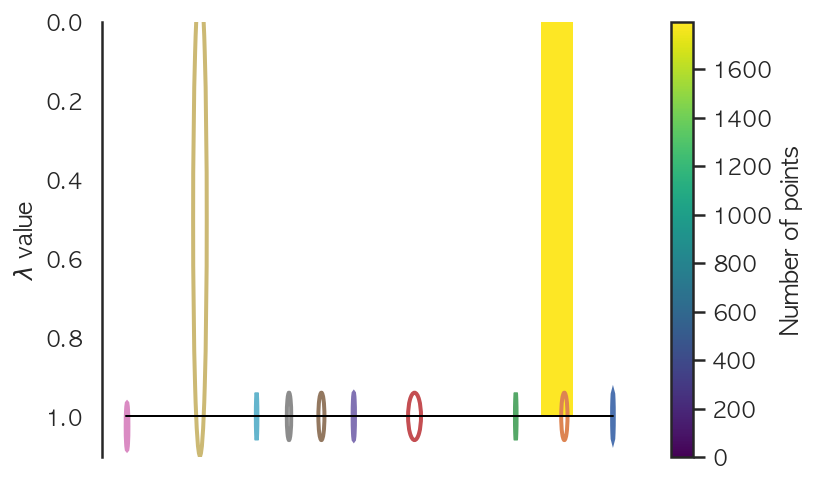

In [551]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=40, gen_min_span_tree=True)
clusterer.fit(vector)

# 클러스터를 몇개로 하면 좋을지 알려줌
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [552]:
vector = np.array(vector) # Normalizer를 이용해 변환된 벡터
model_hds = hdbscan.HDBSCAN(min_cluster_size=40).fit(vector)
# 거리 계산 식으로는 Cosine distance를 이용
result = model_hds.fit_predict(vector)
datas['result'] = result
datas['result'].unique()

array([ 6, -1,  8,  2,  4,  1,  9,  5,  7,  3,  0])

In [553]:
for cluster_num in set(result):

    print("cluster num : {}".format(cluster_num))
    temp_df = datas[datas['result'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['facltNm']:
        print(title) # 'full_text'로 군집된 데이터 살펴보기
    print()

cluster num : 0
올덴캠핑장
네스트캠핑
용수 그린랜드
리앤파크
산내들 패밀리 어드벤처파크
백운산 자연휴양림 자동차야영장
무지개서는 마을
래미안밸리캠핑장
벗과뱃나루 캠핑리조트
문복산 캠핑장
베스트필드
고목정
휴앤락캠핑장
솔내음 캠핑장
청량산 나무네숲 캠핑장
캠파제주
지지밸리야영장
장호비치캠핑장
전원일기마을 오토캠핑장
대둔산자연휴양림캠핑장
청풍호오토캠핑장
은행마을
제주벨리타캠핑장
천안OK캠핑
이태백 야영장
임하호 수상레저타운캠핑장
속리산사나래캠핑장
서천 늘푸른캠핑장
서천해양캠핑장
석문 오토캠핑장
엘포리글램핑
상주 경천대 오토 캠핑장
상주 우산캠핑장
피플앤독 힐링캠핑장
핏들캠핑장
하늘바라기 글램핑
씨카라반
숲속에서 캠핑장
하늘숲글램핑 파크
연지곤지 캠핑장
호두나무캠핑장
그린오토캠핑장
페리아오토캠핑장
달서별빛캠프 캠핑장
화니캠핑앤글램핑
횡성군 병지방 오토캠핑장

cluster num : 1
바인밸리 수영장 캠핑장
느랭이골
김천부항댐 산내들 오토캠핑장
느티나무야영장
덕동 산상낙원
늘푸른펜션캠핑장
다람쥐 쉼터
드림이벤트
유토피아 오토캠핑장
왕피천하늘담야영장
청개울낚시 캠핑장
유명산밸리캠핑장
몽산포 자동차 야영장
가야산국립공원 치인자동차야영장
캠프 안단테
은석캠핑장
쿼크밸리 캠프
리즈밸리 글램핑캠핑장
입화산 참살이 숲 야영장
파계 오토캠핑장
파라독스캠핑
메타파크
명돈골 캠핑장
푸른고래 카라반 캠핑
캠핑스마일
캠핑포유 캠핑장
홀스킹덤 글램핑
브라보캠핑장
힐링아일랜드 글램핑
가평글램핑클럽레스피아
캠프통 아일랜드
왕피천관광농원
가마미야영장
가평카라반캠핑농원
양달캠핑장
국립유명산자연휴양림(일반)
금다래캠핑장
에이스카라반
용인힐링캠핑장
우리들캠핑장
문화관광농원청소년야영장
사촌해수욕장야영장
별다리 캠핑
산꽃벚꽃마을 오토캠핑장
산내들민박&오토캠핑장
미루밸리 캠핑장
마방캠핑장
민들레동산 캠핑장
맑은개울 캠핑장
별장캠핑카
맘빌리지
망상오토캠핑리조트 제2오토캠핑장
산아래 캠핑장
반디캠프
명지산카라반오토캠핑장
봉화구마낚시야영장
블루오션리조트, 오션파크
밤소리글램핑
무도글램핑
배너미

별빛마을
해인캠핑장
(주)밀모 빨강치마자동차야영장
행복한나드리캠핑장
화왕산자연휴양림
마실 야영장

cluster num : -1
몽골캠핑장
고운마을캠핑장
솔미캠핑장
강나루야영장
스카이랜드리조트
옥전캠핑장
새움정
더하루캠핑파크
(주)수동자연마을 힐링별밤수목원캠핑장
덕산참숯랜드
가평포레스트카라반랜드
오크힐글램핑
오투글램핑
오투스토리
옥계오토캠핑장
옥샘캠핑장
옥성 자연휴양림
온더락캠핑장
온새미캠핑장
와이글램핑
연천재인폭포오토캠핑장
영덕 고래불 국민 야영장
영덕 칠보산 오토캠핑장
영산강 승촌보캠핑장
영우네 농어촌 관광농원
영월 스타 글램핑
영월별마로펜션캠핑
아산 영인산자연휴양림 숲속야영장
영천 솔롱고 글램핑
영천시 공예촌 캠핑체험장
영학관광농원야영장
예마을캠핑장
예산 느티나무 캠핑장
예당관광지 국민여가캠핑장
예손농원캠핑장
예원캠핑장
예천군 곤충나라 사과테마파크 오토캠핑장
옛서당캠핑농원
오글오글오토캠핑장
오류캠핑장
오도산 자연휴양림
오수애견캠핑장
오시아노 오토캠핑리조트
선녀와 나무꾼
가지산 자연캠핑장
가창농원 야영장
가평사계절캠핑장
가평 사과나무 캠핑장
가평 운악홀리데이 캠핑장
가평황토은글램핑
흑석산 자연 휴양림
각흘봉관광농원
감 이야기 캠핑장
강나루 오토캠핑장
(주)디노담양힐링파크 지점
(주)쉐르빌리안티티
(주)아웃오브파크
쥴리어스지점 휴토피아
(주)자연에너지-드림랜드오토캠핑장
(주)자연인
(주)태평소금 천일염 힐링캠프
505펜션&캠핑(오공오)
Camp 1950 by 민들레울
CLUB 596
F1 오토캠핑장
THATS CAMPING 횡성자연휴양림야영장
The Star 오토캠핑장
VIP오토캠핑장
W글램핑
㈜제주글램핑
가람관광농원
가래골농원 캠핑장
가루실캠프
가산 글램핑
가산산성 야영장
가야권역 소리마실 영농조합법인
가온누리캠핑체험장
가우도카라반펜션
가은해솔캠핑장
변산 오토캠핑장
가족쉼터
용설호수캠핑장
판운캠핑장
레이크문캠핑장
강나루 캠핑장
와이와이글램핑
아쿠아베이(주) 글램핑
열두달캠핑장
토리아이글램핑
에어그라운드
할매야영장
호명산잣나무숲속캠핑장
더 포레스트
가야산 캠

In [554]:
datas['result'].unique()

array([ 6, -1,  8,  2,  4,  1,  9,  5,  7,  3,  0])

In [35]:
path = "../datas/"
nv_data = pd.read_csv(path+'v5_category_re.csv')
kk_data = pd.read_csv(path+'kakao_camping_review_revised.csv')

In [92]:
nv_data2 = nv_data[['highlight_review', 'title']]
nv_data2 = nv_data2.dropna()
nv_df = nv_data2.set_index('title').astype(str).groupby(level=0).agg(', '.join).reset_index()
nv_df = nv_df.rename(columns={"title": "place_name", "highlight_review": "contents"})

In [90]:
kk_data2 = kk_data[['contents','place_name']]
kk_data2 = kk_data2.dropna()
kk_df = kk_data2.set_index('place_name').astype(str).groupby(level=0).agg(', '.join).reset_index()

In [98]:
review_data = pd.concat([nv_df,kk_df],0)
review_data

,place_name,contents
0,(주)데일리랜드,"소음이심하다, 샤워실과 개수대에 온수도안나오, 산속 넓은 사이트 깨끗하고 관리가 잘..."
1,(주)아웃오브파크,"사장님 모두 엄청 친절하시고 최고였어요, 바베큐 그릴도 좋습 니다, 분위기좋음, 너..."
2,(주)어반슬로우시티,"화장실도 침구도 너무 깨끗하고 좋았어요, 시설이 너무 깔끔하고, 깨끗했어요, 시설 ..."
3,HJ글램핑,"침구류도 깨끗하고, 침대 크고 방은 마음에 들었어요, 난방도 잘 되어, 온수도 잘 ..."
4,The Star 오토캠핑장,"시설도 깨끗하고 좋았어요, 데크도 넓고, 온수가 안나와서, 시설관리도 잘 되어, 주..."
...,...,...
902,휴파크 오토캠핑장,휴파크내 카라반 사무실겸 구멍가게 파워에이드2600ml사이다 큰병1개\n합이 700...
903,흙집섬진강풍경,"넓고 깨끗하고 싸다, 여기도 함 가봐야겠네?!, 이런곳이..??, ^^*, 켐핑장"
904,힐링가평오토캠핑장,"2박했는데 편하고좋았어요 사장님이 아주친절하셔서 좋았네요, 사장님 친절하시고 임진강..."
905,힐링아일랜드 글램핑,열두시가 넘도록 웃고 떠들어대는 큰목소리의 건너편 텐트만 아니었다면 좋은편입니다\...


In [101]:
okt = Okt() # 형태소 분석기 객체 생성
noun_list = []
for content in review_data['contents']: 
    nouns = okt.nouns(content) # 명사만 추출하기, 결과값은 명사 리스트
    noun_list.append(nouns)
    
review_data['nouns'] = noun_list
review_data.head()

,place_name,contents,nouns
0,(주)데일리랜드,"소음이심하다, 샤워실과 개수대에 온수도안나오, 산속 넓은 사이트 깨끗하고 관리가 잘...","[소음, 샤워실, 개수대, 도안, 산속, 사이트, 관리, 데크, 데크, 커서, 차량..."
1,(주)아웃오브파크,"사장님 모두 엄청 친절하시고 최고였어요, 바베큐 그릴도 좋습 니다, 분위기좋음, 너...","[사장, 모두, 최고, 바베큐, 그릴, 습, 분위기]"
2,(주)어반슬로우시티,"화장실도 침구도 너무 깨끗하고 좋았어요, 시설이 너무 깔끔하고, 깨끗했어요, 시설 ...","[화장실, 침구, 시설, 시설, 데크, 아주, 조명, 더욱, 여태껏, 캠핑장, 시설..."
3,HJ글램핑,"침구류도 깨끗하고, 침대 크고 방은 마음에 들었어요, 난방도 잘 되어, 온수도 잘 ...","[침구, 류, 침대, 방, 마음, 난방, 온수, 물, 침구, 류, 운점, 물이, 시..."
4,The Star 오토캠핑장,"시설도 깨끗하고 좋았어요, 데크도 넓고, 온수가 안나와서, 시설관리도 잘 되어, 주...","[시설, 데크, 온수, 시설, 관리, 주차, 협소해짐, 길이, 조금, 온수, 계단,..."


In [112]:
# 문서를 명사 집합으로 보고 문서 리스트로 치환 (tfidfVectorizer 인풋 형태를 맞추기 위해)
text = [" ".join(noun) for noun in review_data['nouns']]

tfidf_vectorizer = TfidfVectorizer(min_df = 5, ngram_range=(1,5))
tfidf_vectorizer.fit(text)
vector = tfidf_vectorizer.transform(text).toarray()

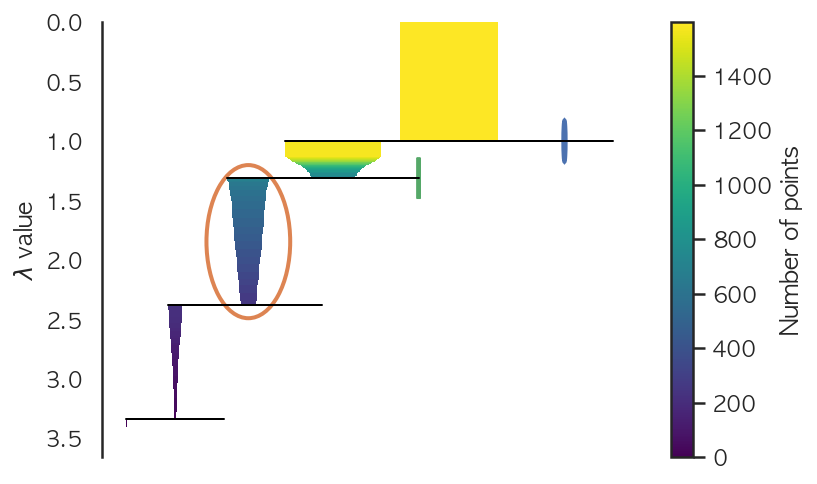

In [137]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, algorithm='generic', metric='cosine', gen_min_span_tree=True)
clusterer.fit(vector)

# 클러스터를 몇개로 하면 좋을지 알려줌
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [180]:
vector = np.array(vector) # Normalizer를 이용해 변환된 벡터
# model_hds = hdbscan.HDBSCAN(min_cluster_size=4, algorithm='generic', metric='cosine').fit(vector)
model = DBSCAN(eps=0.7,min_samples=9, metric = "cosine")
# 거리 계산 식으로는 Cosine distance를 이용
# result = model_hds.fit_predict(vector)
result = model.fit_predict(vector)
review_data['result'] = result
review_data['result'].unique()

array([ 0, -1,  3,  2,  1,  4])

In [184]:
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = review_data[review_data['result'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['place_name']:
            print(title) #캠핑장명으로 살펴보자
        print()

cluster num : 1
고산 무궁화 오토캠핑장
구봉산오토캠핑장 나인힐스
두밀숲캠핑장
또올래캠핑장
멤피스 글램핑
몽산포오토캠핑장 2구역
스마일캠핑장
캠핑라운지
포시즌 캠핑장
홀스킹덤 글램핑

cluster num : 2
가마실캠핑장
금대자동차야영장
백양사 가인야영장
백운계곡캠핑장
변산 오토캠핑장
산청별천지캠핑장
샛별글램핑
서석캠핑장
워렉스 캠핑랜드
입화산 참살이 숲 야영장
포천리컴펜글

cluster num : 3
(주)밀모 빨강치마 야영장
나그네캠핑장
문복산 캠핑장
밤벌오토캠핑장
설하관광농원
오투글램핑
이화야영장
진경원민박캠핑장
치악신림오토캠핑장
패밀리 오토캠핑장
푸른숲캠핑장
한우물영농조합법인 제주캠핑카라반

cluster num : 4
녹두장군 전봉준관
물왕숲캠핑파크
송정 자연휴양림
숲속 동키마을 캠핑장
슬로우캠프
씨카라반
알프스 휴양림
카라반에코빌리지
캠프1530



In [212]:
tsne = TSNE(learning_rate=100)
tsne_fit = tsne.fit_transform(vector)
tsne_df = pd.DataFrame(tsne_fit,index=review_data['place_name'], columns=['x', 'y'])

In [249]:
# 모델 객체 생성
model_hds = hdbscan.HDBSCAN(min_cluster_size=14).fit(tsne_df)

# 예측 데이터 생성
pred_hds = model_hds.fit_predict(tsne_df)

# 데이터 프레임 만들기
df3 = pd.DataFrame(tsne_df)
df3["labels"] = pred_hds

print(np.unique(df3["labels"]), len(df3))
df3.tail(2)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 1596


,x,y,labels
place_name,,,
힐링아일랜드 글램핑,1.154943,1.742038,16
힐사이드캠핑장,7.935756,0.338104,8


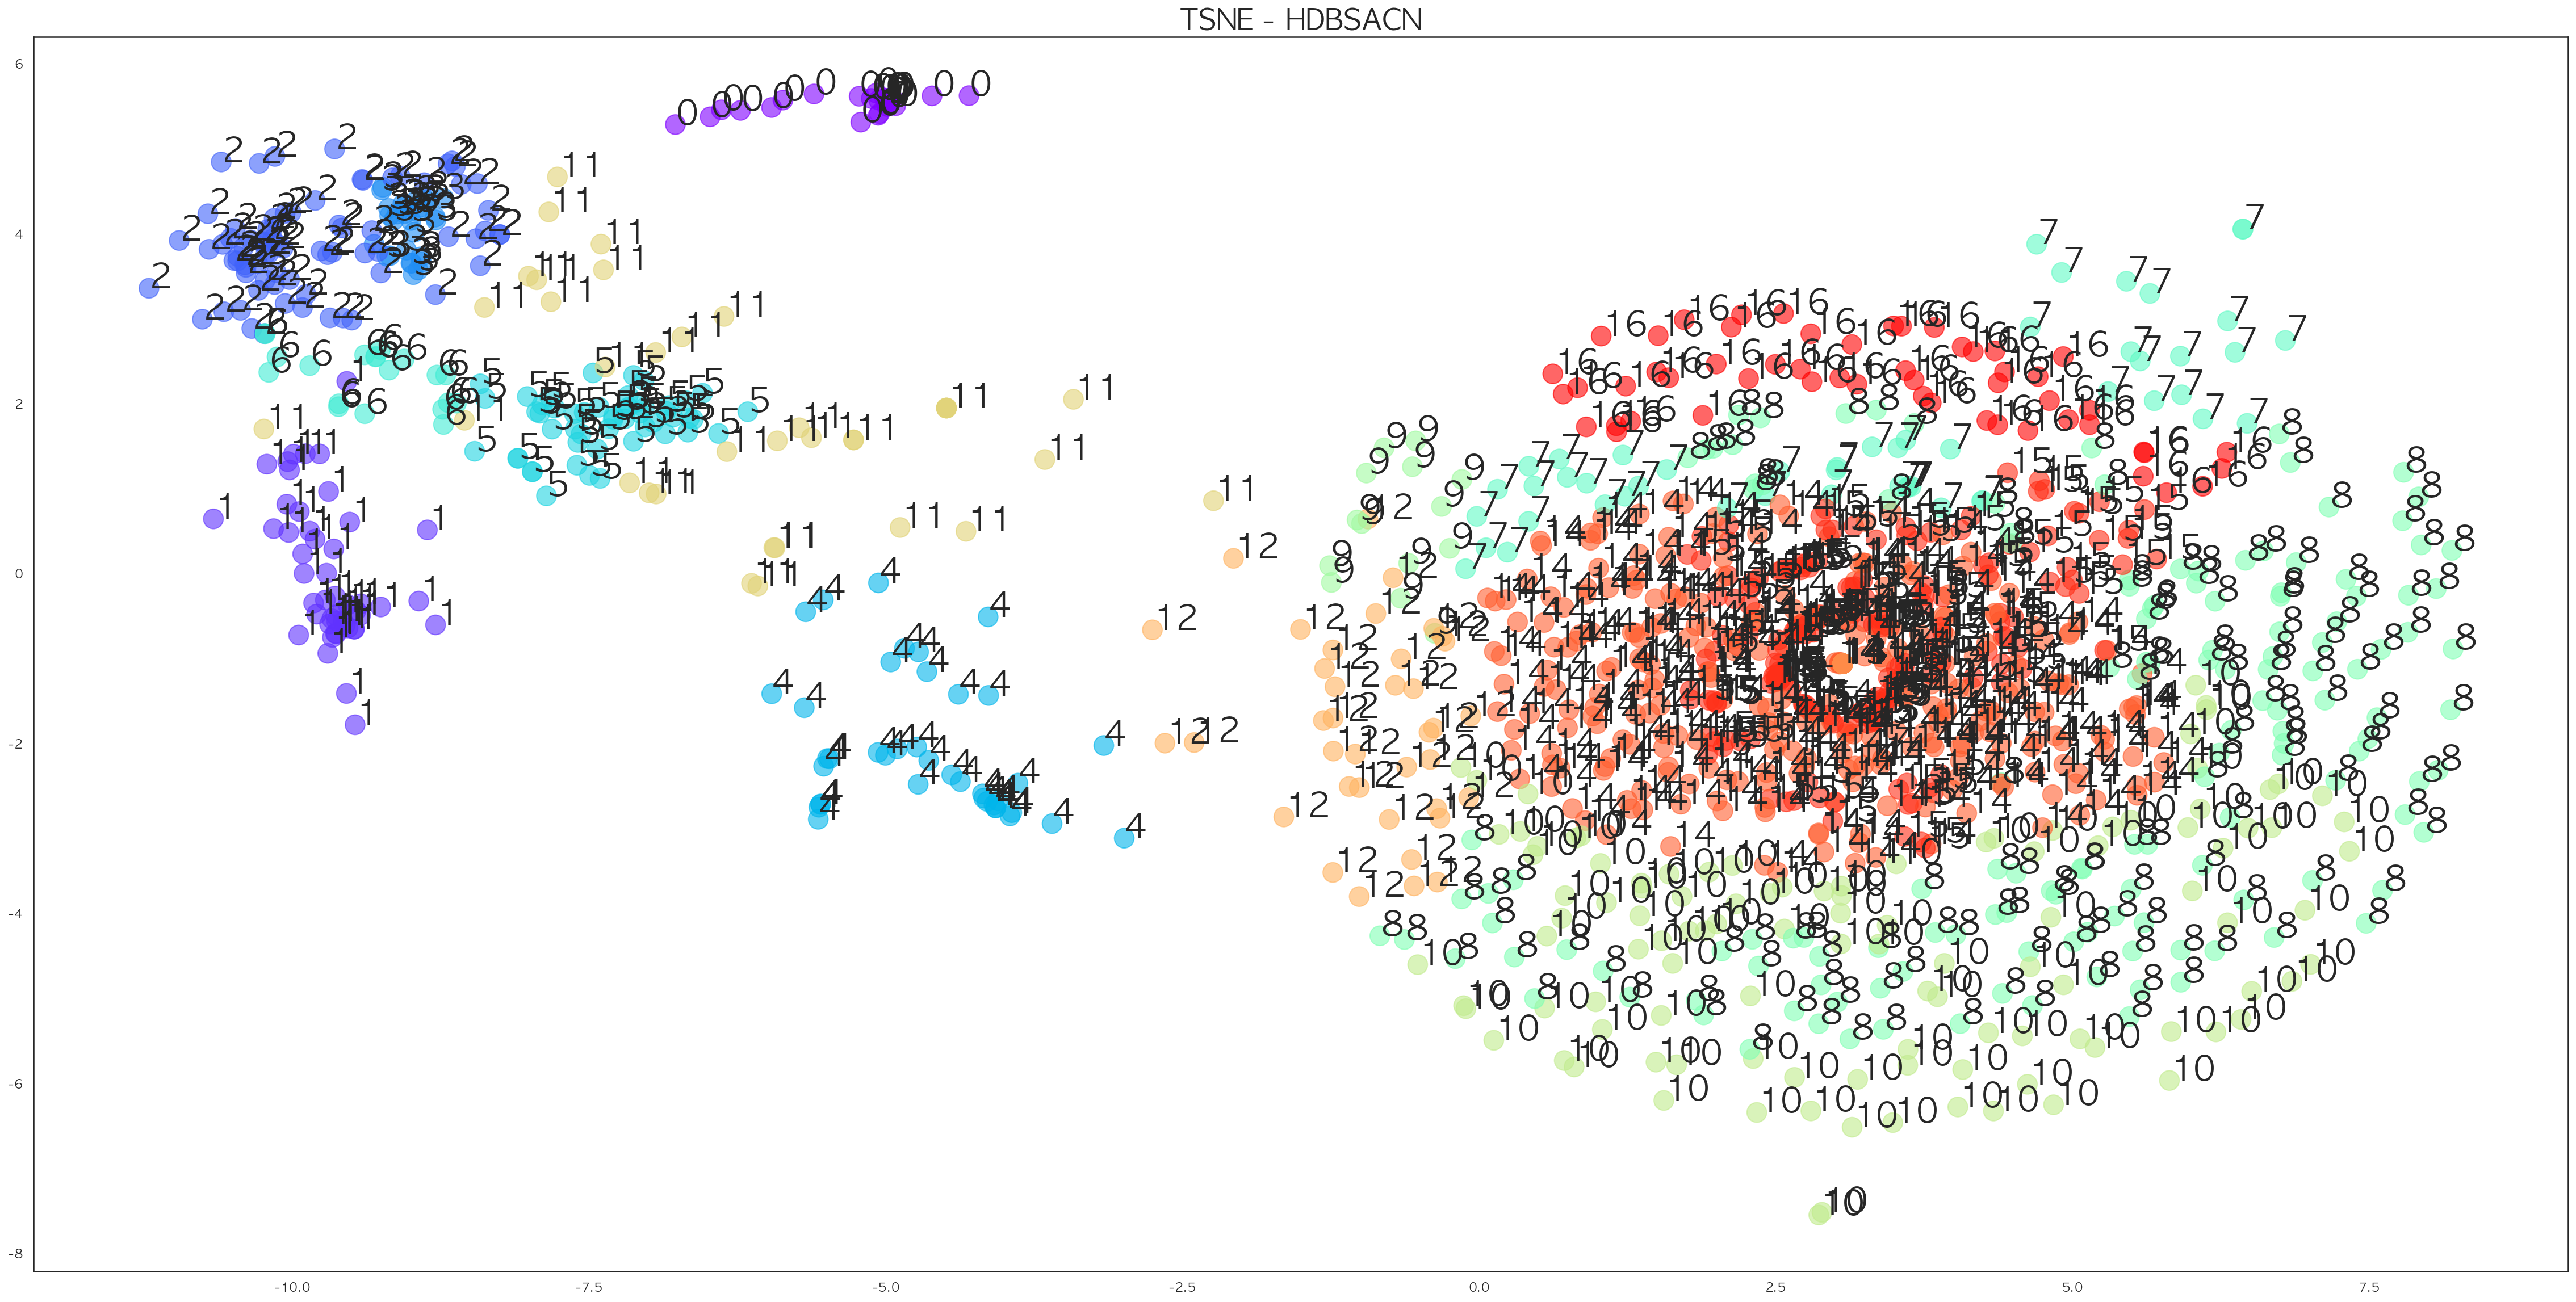

In [250]:
plt.figure(figsize=(40, 20))
plt.title("TSNE - HDBSACN", fontsize= 25)
df3.drop(df3[df3['labels']== -1].index,inplace=True)
plt.scatter(df3["x"], df3["y"], c= df3["labels"], s=300, cmap="rainbow", alpha=0.6)
    
for i, v in enumerate(df3['labels']):
    plt.annotate(v, xy=(df3["x"][i], df3["y"][i]), fontsize=30)

plt.show()

In [251]:
for idx in np.unique(df3["labels"]):
    print(f"Group{idx}\n",df3[df3["labels"]==idx].index.tolist())

Group0
 ['㈜씨스테이 야영장', '강릉 금진리321카라반', '굼벵이캠핑농원', '그랑블루 글램핑야영장', '만리포미소카라반', '물결캠핑장', '바다풍경카라반', '백사장사계절 숲속야영장', '베이스캠프 캠핑장', '비치캠핑장', '서건도카라반', '십리포해수욕장 야영장', '아름다운글램핑장', '양양캠핑장', '왕산가족오토캠핑장', '유니의바다 카라반캠핑장', '제주플래티늄카라반', '캠핑엔비치', '캠핑코리아 카라반오토캠핑장', '타요캠핑장', '푸른고래 카라반 캠핑', '학암포 퍼스트 캠핑장', '학암포나로야영장', '(주)태평소금 천일염 힐링캠프', '구시포 해수욕장 노을 캠핑장']
Group1
 ['stay714', '가평 물골숲 계곡 캠핑장', '가평설악 하늘계곡 캠핑장', '강촌강변오토캠핑장', '계곡메사오토메사캠핑장펜션', '깊이울마을 야영장', '늘예솔글램핑', '달재오토캠핑장', '더좋은 펜션 캠핑장', '덕동골 오토캠핑장', '덕유캠프농장', '도리돌 캠핑장', '밤별생각 낮달이야기', '백운힐링 캠핑장', '별밤 야영장', '별밤글램핑', '봉화별야영장', '비타민 캠핑장', '삼척엘림캠핑장', '샘골솔밭야영장', '서석캠핑장', '소나무숲아래', '소풍캠핑장', '솔방울캠핑장', '스카이 펜션&캠핑장', '썬오브캠핑장', '아버지의숲 산정캠프', '에이스카라반', '영월 스타 글램핑', '영월별마로펜션캠핑', '예그리나숲', '용골송어와 캠핑', '용소캠핑장', '용오름캠핑장', '은석캠핑장', '자연과함께 펜션캠핑장', '중바위캠핑장', '지리산 카라반 캠핑장', '채움카라반리조트', '칼봉산카라반캠핑장', '파인트리 캠핑장', '패밀리야영장', '평창 보물섬캠핑장', '포시즌스 오토캠핑장', '포안캠핑', '하늘그린캠프', '함양 용추 오토캠핑장', '휴일엔캠핑', '히어리캠핑장']
Group2
 ['YELLOW HILL', '강릉여행 굿캠핑', '그날카라반', '그림나래 힐링캠프', '글램핑스토리', '글램핑코리아 애견캠핑